<a href="https://colab.research.google.com/github/ramirezzzluisss/pythonprojects/blob/main/HonorsThesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Honors Thesis Data Analysis
## Utah DOPL Contractor Credit Qualtrics Survey

In [472]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from numpy import loadtxt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LinearRegression

from xgboost import XGBClassifier
from xgboost import plot_tree

import statsmodels.api as sm
from scipy import stats
import textwrap
from itertools import product
from six import StringIO
from IPython.display import Image  
import pydotplus

In [473]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [474]:
# connect to csv data file

from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/UtahContractorSurvey202304251550.csv')

Mounted at /content/gdrive


In [475]:
# preview number of rows and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              2656 non-null   object
 1   EndDate                2656 non-null   object
 2   Status                 2656 non-null   object
 3   IPAddress              2648 non-null   object
 4   Progress               2656 non-null   object
 5   Duration (in seconds)  2656 non-null   object
 6   Finished               2656 non-null   object
 7   RecordedDate           2656 non-null   object
 8   ResponseId             2656 non-null   object
 9   RecipientLastName      2 non-null      object
 10  RecipientFirstName     2 non-null      object
 11  RecipientEmail         2 non-null      object
 12  ExternalReference      2 non-null      object
 13  LocationLatitude       1987 non-null   object
 14  LocationLongitude      1987 non-null   object
 15  DistributionChannel  

In [476]:
df.head(15)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q21_8_TEXT,Q22,Q29
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Has your business been approved for a loan thr...,Has your business been approved for a business...,How would you rate your relationship with your...,Is your accountant or tax preparer a Certified...,How much revenue/sales did your business make ...,What is your business's total outstanding busi...,What is the top source of financing for your b...,What is the top source of financing for your b...,Which of the following Utah consulting service...,Enter your phone number if you are interested ...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID14""}","{""ImportId"":""QID15""}","{""ImportId"":""QID16""}","{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID20_8_TEXT""}","{""ImportId"":""QID21""}","{""ImportId"":""QID28_TEXT""}"
2,2023-02-13 15:10:50,2023-02-13 15:12:01,Survey Preview,NaN,100,70,True,2023-02-13 15:12:01,R_1lidpbGA9ypeT2L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-16 21:46:47,2023-02-16 21:50:44,Survey Preview,NaN,100,236,True,2023-02-16 21:50:45,R_1CHhLtsrT1hBKQ4,NaN,...,Approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-02-27 13:45:55,2023-02-27 13:48:28,Survey Preview,NaN,100,152,True,2023-02-27 13:48:29,R_2QYbxOXJxwk7sRc,NaN,...,Did not apply,Did not apply,No Relationship,I DO NOT know,$100k - $250k,$0,Local Bank or Credit Union,NaN,"Small Business Administration,Small Business D...",NaN
5,2023-02-27 14:43:19,2023-02-27 14:43:48,Survey Preview,NaN,100,29,True,2023-02-27 14:43:49,R_RrwxY3MgIlhiidP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2023-03-03 10:49:34,2023-03-03 10:51:27,Survey Preview,NaN,100,112,True,2023-03-03 10:51:28,R_pSEuN2bwWsxMxyN,NaN,...,Did not apply,Did not apply,No Relationship,No,$100k - $250k,$0,Personal and Family Savings,NaN,"Small Business Administration,Suazo Business C...",NaN
7,2023-03-03 10:51:33,2023-03-03 10:51:47,Survey Preview,NaN,100,13,True,2023-03-03 10:51:49,R_2AXXEMMkIVqtM7g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2023-03-03 11:00:24,2023-03-03 11:03:34,IP Address,107.3.87.173,100,190,True,2023-03-03 11:03:34,R_3iJeQAfkldNjMcV,NaN,...,Did not apply,Approved,Excellent,Yes,More than $1M,$0,Other,Cash,Small Business Administration,NaN
9,2023-03-03 11:19:32,2023-03-03 11:23:22,IP Address,174.204.5.25,100,229,True,2023-03-03 11:23:22,R_25WUjfR7BFCSpxT,NaN,...,Did not apply,Did not apply,Excellent,Yes,$250k - $1M,$25k-$100k,Personal and Family Savings,NaN,"Small Business Administration,Women's Business...",NaN


In [477]:
# clean data
df.rename(columns = {'Q2':'LicenseClassification',
                     'Q3':'EntityType',
                     'Q4':'LatinxShareholders',
                     'Q5':'Age',
                     'Q6':'YearsofExperience',
                     'Q7':'ConstructionFocus',
                     'Q8':'LEED',
                     'Q9':'BusinessPlan',
                     'Q10':'EINApplication',
                     'Q11':'NumOfEmployees',
                     'Q12':'LatinxEmployeesPercent',
                     'Q13':'WorkAccidents',
                     'Q14':'SBALoan',
                     'Q15':'PPPLoan',
                     'Q16':'BankCreditUnionLoan',
                     'Q17':'LoanOfficerRelationship',
                     'Q18':'AccountantCPA',
                     'Q19':'Revenue2022',
                     'Q20':'TotalOutstandingDebt',
                     'Q21':'TopFinancingSource',
                     'Q22':'ConsultingServices',
                     'Q23':'RaceAndEthnicity',
                     'Q24':'Gender',
                     'Q25':'Education',
                     'Q26':'CreditScore',
                     'Q27':'HomeOwner',
                     'Q28':'EnglishLanguage',
                     'Q29':'PhoneNumber',
                     }, inplace = True)

# delete first 8 rows
df_clean = df.iloc[8:]

# drop null rows for race and ethnicity because we are interested
# in analyzing differences in this demographic category
df_clean = df_clean.dropna(axis=0, subset=['RaceAndEthnicity'])

# filter out contractors that are retired
df_clean = df_clean[(df_clean['EntityType'] != 'I am RETIRED')]

# view columns, row count, and datatypes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 8 to 2655
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   StartDate                1974 non-null   object
 1   EndDate                  1974 non-null   object
 2   Status                   1974 non-null   object
 3   IPAddress                1974 non-null   object
 4   Progress                 1974 non-null   object
 5   Duration (in seconds)    1974 non-null   object
 6   Finished                 1974 non-null   object
 7   RecordedDate             1974 non-null   object
 8   ResponseId               1974 non-null   object
 9   RecipientLastName        0 non-null      object
 10  RecipientFirstName       0 non-null      object
 11  RecipientEmail           0 non-null      object
 12  ExternalReference        0 non-null      object
 13  LocationLatitude         1963 non-null   object
 14  LocationLongitude        1963 non-null  

In [478]:
SurveyResponseRate = 1974/27290

print(SurveyResponseRate)

0.07233418834738


# Data Visualisation and Descriptive Statistics

In [479]:
# this is used to wrap the x labels for the bar graphs
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [480]:
df_clean['RaceAndEthnicity'] = pd.Categorical(df_clean['RaceAndEthnicity'],
                                         categories = ['White', 'Hispanic or Latino/a/x', 'Black or African American', 'Asian',
                                                       'Native Hawaiian or Pacific Islander', 'American Indian or Alaska Native', 'Other'],
                                         ordered = True)

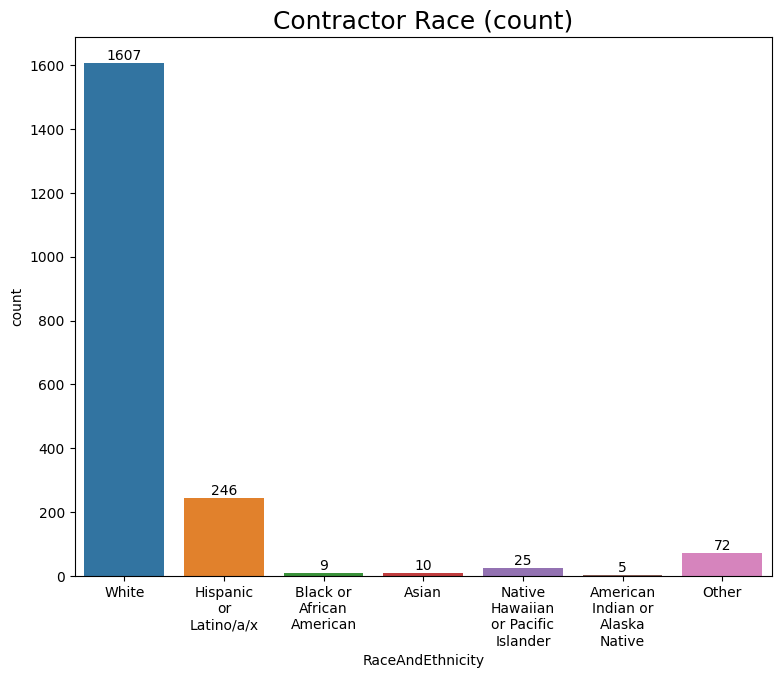

In [481]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('Contractor Race (count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

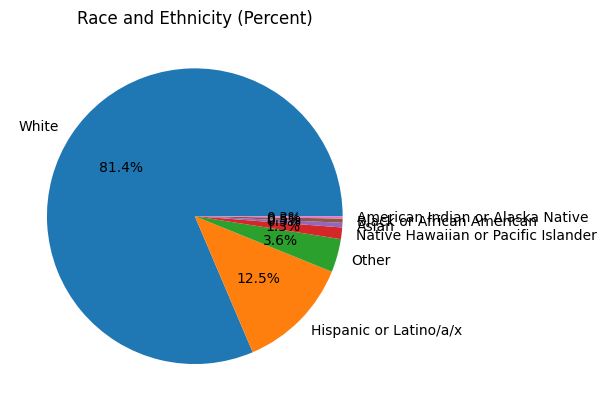

In [482]:
new_df = df_clean.groupby('RaceAndEthnicity').count()
new_df = new_df.sort_values(by='Finished',ascending=False)

new_df.plot(y='Finished',kind='pie',autopct='%1.1f%%')

plt.title("Race and Ethnicity (Percent)")

ax = plt.gca() 
ax.autopct='%1.1f%%'
ax.set_ylabel('')
ax.get_legend().remove()

plt.show()

latinxEntrep = 12.5

In [483]:
df_clean['Revenue2022'].unique()
df_clean['Revenue2022'] = pd.Categorical(df_clean['Revenue2022'],
                                         categories = ['$0', '$25k or less', '$25k - $100k', '$100k - $250k', '$250k - $1M', 'More than $1M'],
                                         ordered = True)

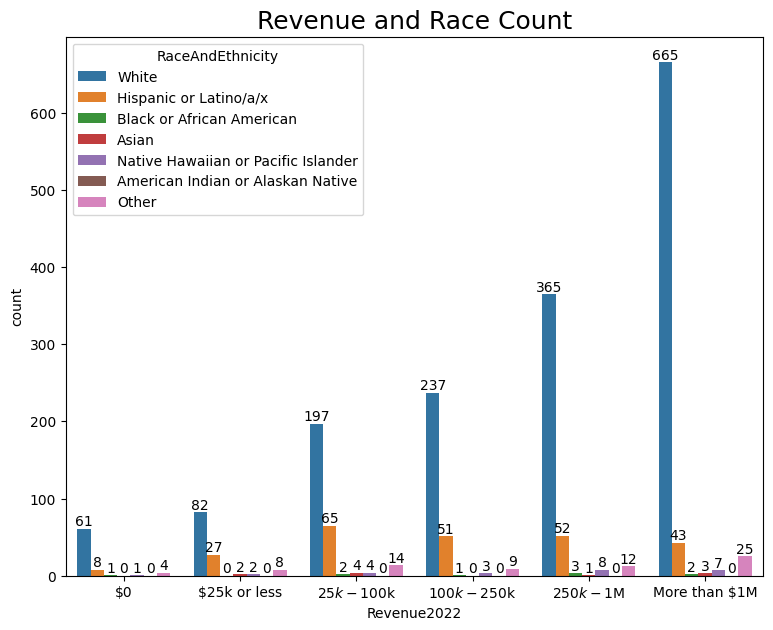

In [484]:
plt.figure(figsize=(9,7))
hue_order = ['White', 'Hispanic or Latino/a/x', 'Black or African American', 'Asian',
             'Native Hawaiian or Pacific Islander', 'American Indian or Alaskan Native',
             'Other']

ax = sns.countplot(x = 'Revenue2022', hue = 'RaceAndEthnicity', hue_order = hue_order, data = df_clean)
#Add title
plt.title('Revenue and Race Count', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

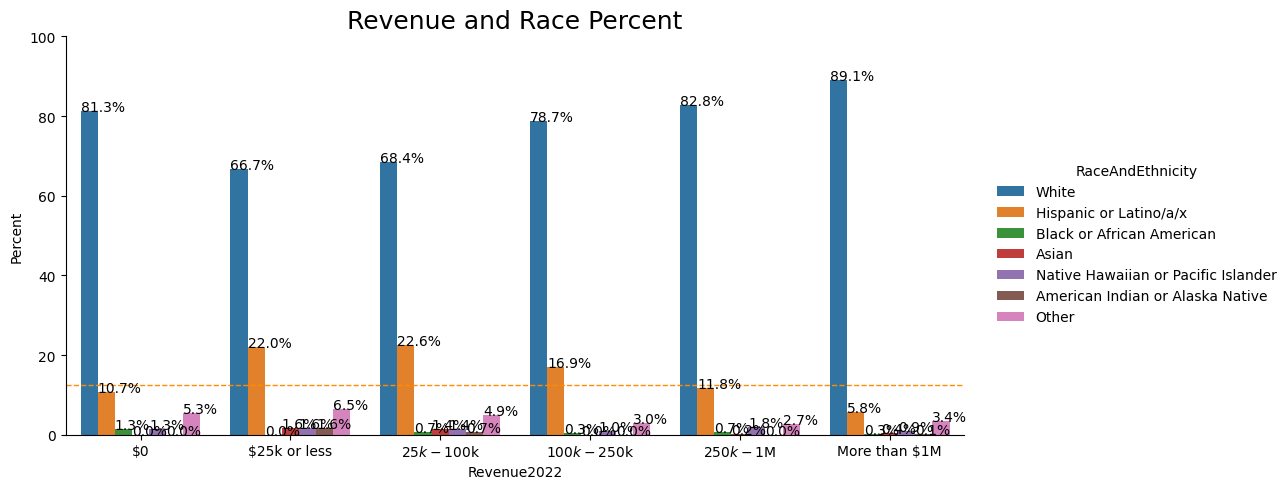

In [485]:
# convert to percentages
new_df = df_clean.groupby('Revenue2022')['RaceAndEthnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='Revenue2022', y='Percent', hue='RaceAndEthnicity', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('Revenue and Race Percent', fontsize=18)

# this is to set the reference on how Latinx make up 15% of population in Utah
g.map(plt.axhline, y=latinxEntrep, ls='--', color='darkorange', linewidth=1)

In [486]:
df_clean['BankCreditUnionLoan'] = pd.Categorical(df_clean['BankCreditUnionLoan'],
                                         categories = ['Approved', 'Did not apply', 'Denied', 'Do not qualify'],
                                         ordered = True)

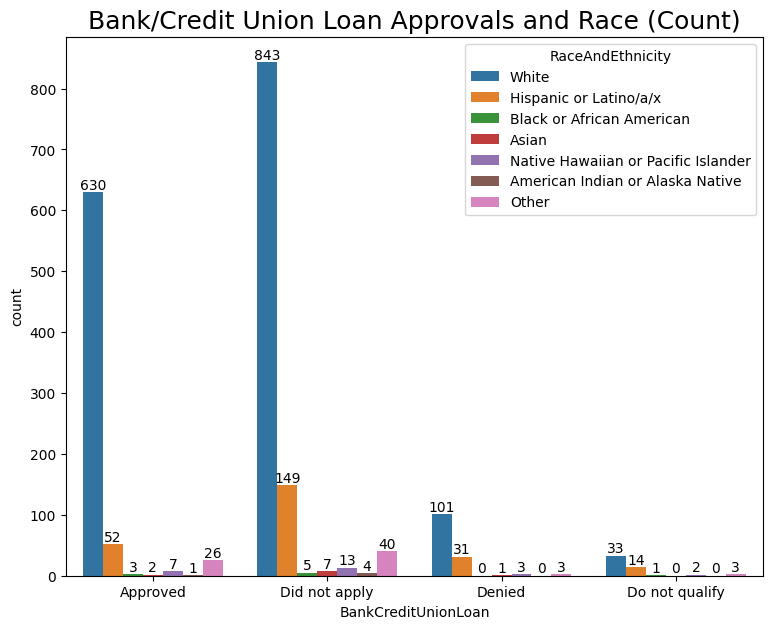

In [487]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'BankCreditUnionLoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('Bank/Credit Union Loan Approvals and Race (Count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

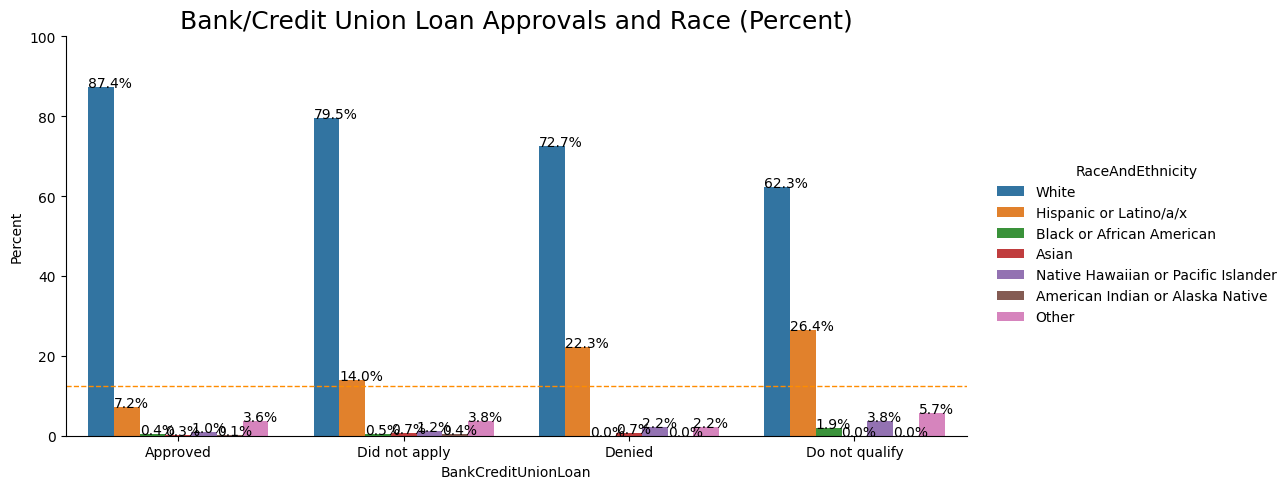

In [488]:
# convert to percentages
new_df = df_clean.groupby('BankCreditUnionLoan')['RaceAndEthnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='BankCreditUnionLoan', y='Percent', hue='RaceAndEthnicity', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('Bank/Credit Union Loan Approvals and Race (Percent)', fontsize=18)

# this is to set the reference on how Latinx make up 15% of population in Utah
g.map(plt.axhline, y=latinxEntrep, ls='--', color='darkorange', linewidth=1)

In [489]:
df_clean['SBALoan'] = pd.Categorical(df_clean['SBALoan'],
                                         categories = ['Approved', 'Did not apply', 'Denied', 'Do not qualify'],
                                         ordered = True)

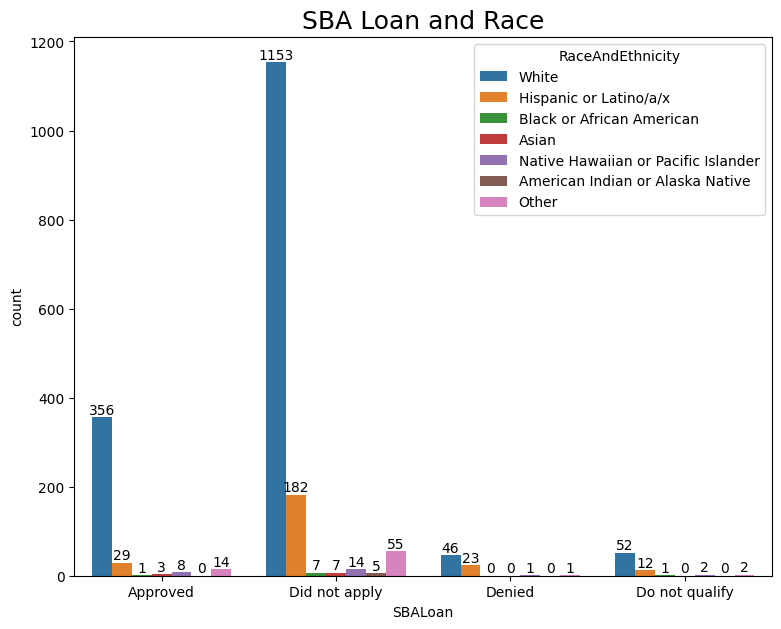

In [490]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'SBALoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('SBA Loan and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

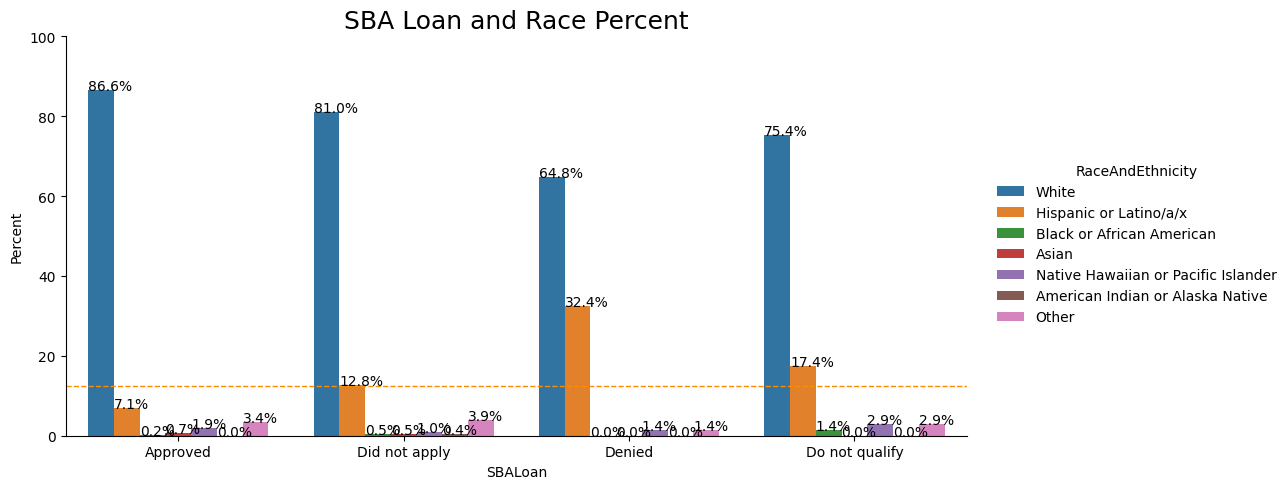

In [491]:
# convert to percentages
new_df = df_clean.groupby('SBALoan')['RaceAndEthnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='SBALoan', y='Percent', hue='RaceAndEthnicity', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('SBA Loan and Race Percent', fontsize=18)
# this is to set the reference on how Latinx make up 15% of population in Utah
g.map(plt.axhline, y=latinxEntrep, ls='--', color='darkorange', linewidth=1)

In [492]:
df_clean['PPPLoan'] = pd.Categorical(df_clean['PPPLoan'],
                                         categories = ['Approved', 'Did not apply', 'Denied', 'Do not qualify'],
                                         ordered = True)

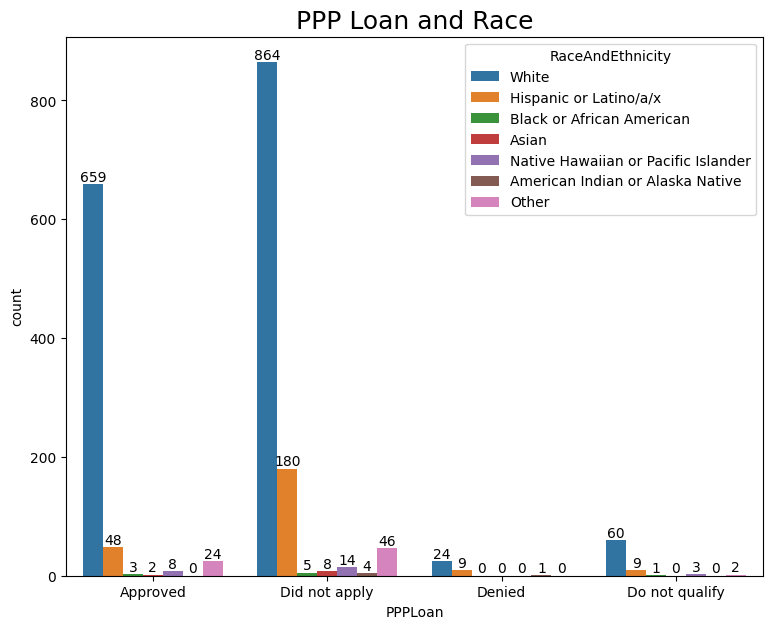

In [493]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'PPPLoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('PPP Loan and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

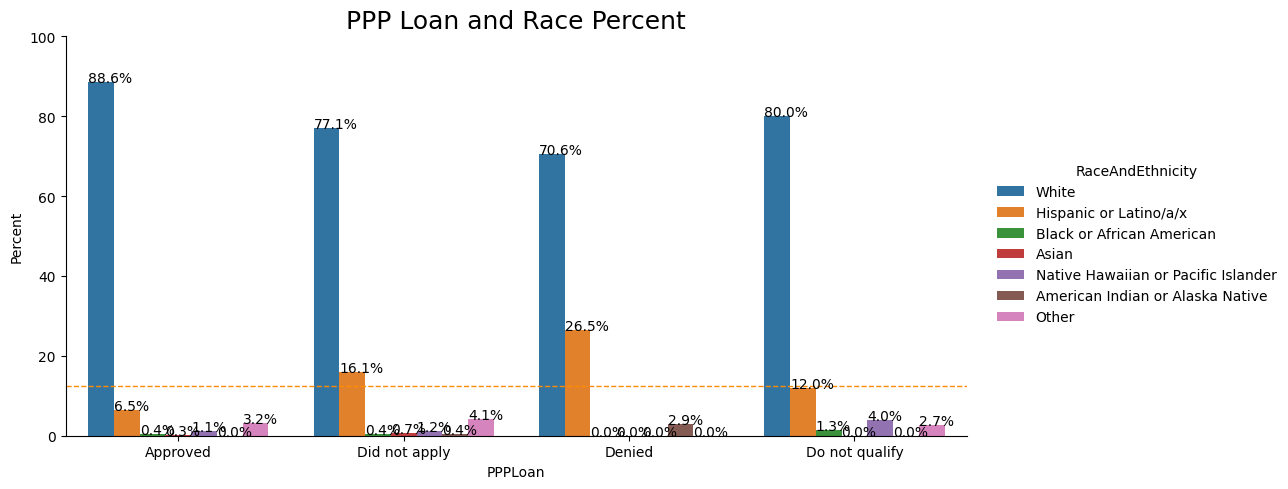

In [494]:
# convert to percentages
new_df = df_clean.groupby('PPPLoan')['RaceAndEthnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='PPPLoan', y='Percent', hue='RaceAndEthnicity', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('PPP Loan and Race Percent', fontsize=18)
g.map(plt.axhline, y=latinxEntrep, ls='--', color='darkorange', linewidth=1)

In [495]:
df_clean['Education'] = pd.Categorical(df_clean['Education'],
                                         categories = ['Less than high school', 'High school graduate or GED', 'Some college',
                                                       'Associates degree', 'Bachelors degree', 'Masters degree', 'Doctorate'],
                                         ordered = True)

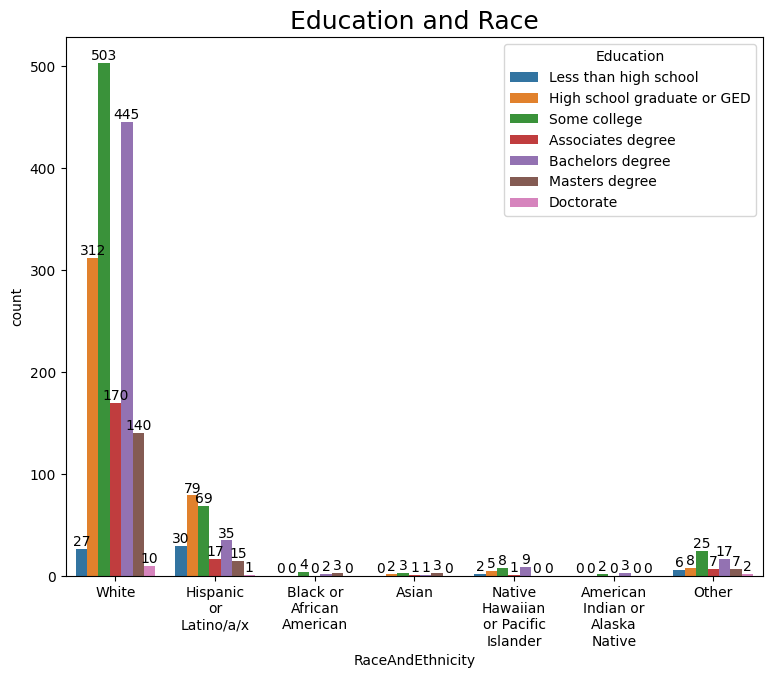

In [496]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'Education', data = df_clean)
#Add title
plt.title('Education and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

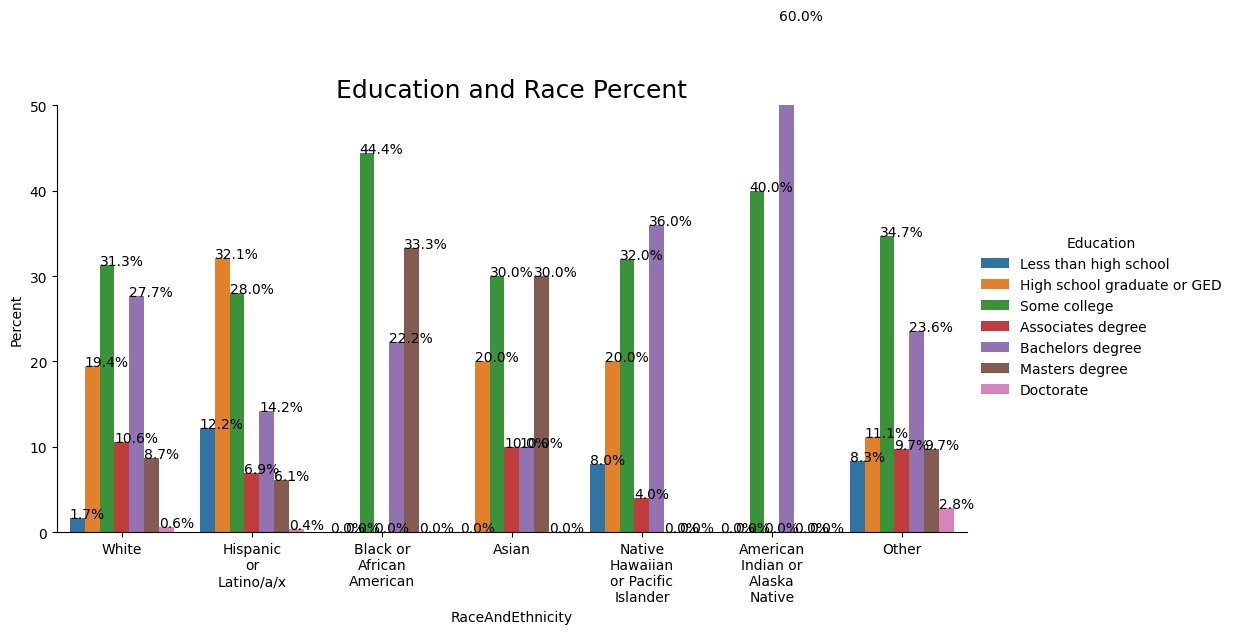

In [497]:
# convert to percentages
new_df = df_clean.groupby('RaceAndEthnicity')['Education'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='RaceAndEthnicity', y='Percent', hue='Education', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,50)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('Education and Race Percent', fontsize=18)

wrap_labels(g.ax, 10)

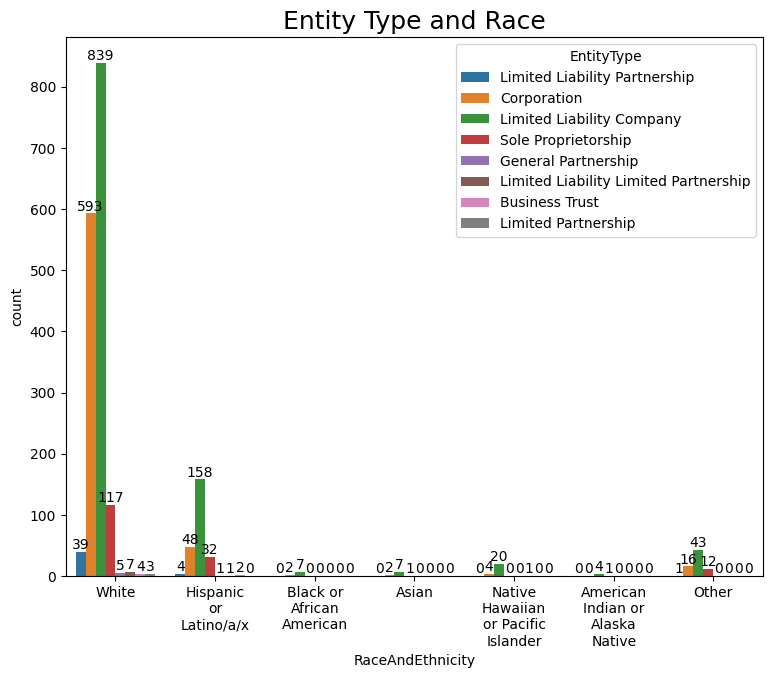

In [498]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EntityType', data = df_clean)
#Add title
plt.title('Entity Type and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

In [499]:
df_clean['EntityType'].unique()

array(['Limited Liability Partnership', 'Corporation',
       'Limited Liability Company', 'Sole Proprietorship',
       'General Partnership', 'Limited Liability Limited Partnership',
       'Business Trust', 'Limited Partnership'], dtype=object)

In [500]:
df_clean['EntityType'] = pd.Categorical(df_clean['EntityType'],
                                         categories = ['Sole Proprietorship', 'Limited Liability Company',
                                                       'Corporation', 'Limited Partnership', 'Limited Liability Partnership',
                                                       'Limited Liability Limited Partnership', 'General Partnership', 
                                                       'Business Trust'],
                                         ordered = True)

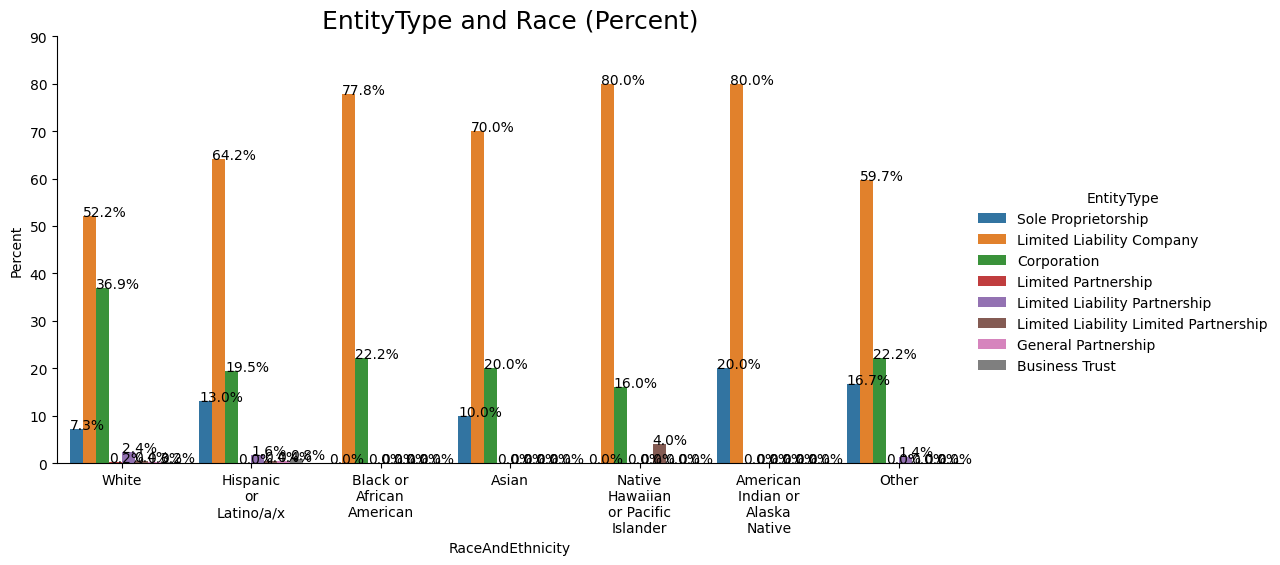

In [501]:
# convert to percentages
new_df = df_clean.groupby('RaceAndEthnicity')['EntityType'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='RaceAndEthnicity', y='Percent', hue='EntityType', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,90)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('EntityType and Race (Percent)', fontsize=18)

wrap_labels(g.ax, 10)

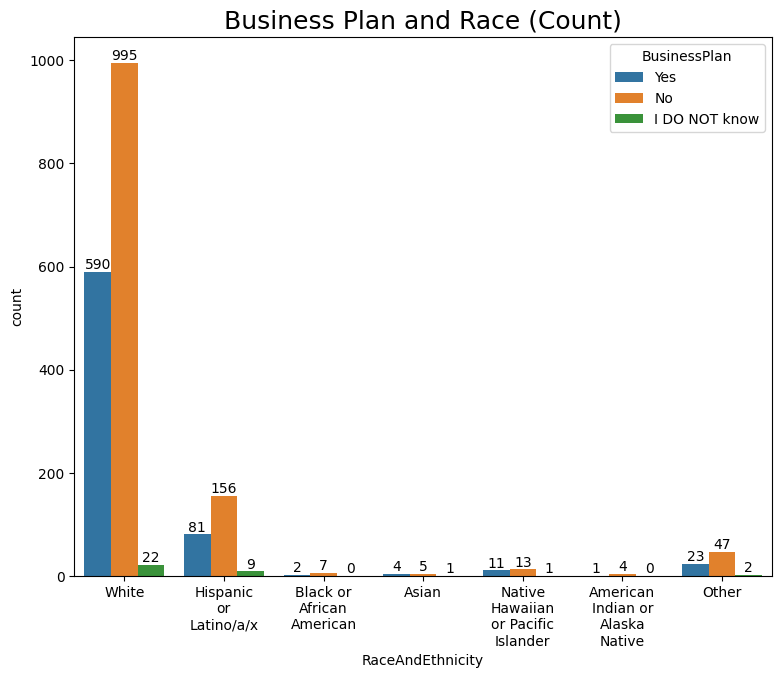

In [502]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'BusinessPlan', data = df_clean)
#Add title
plt.title('Business Plan and Race (Count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

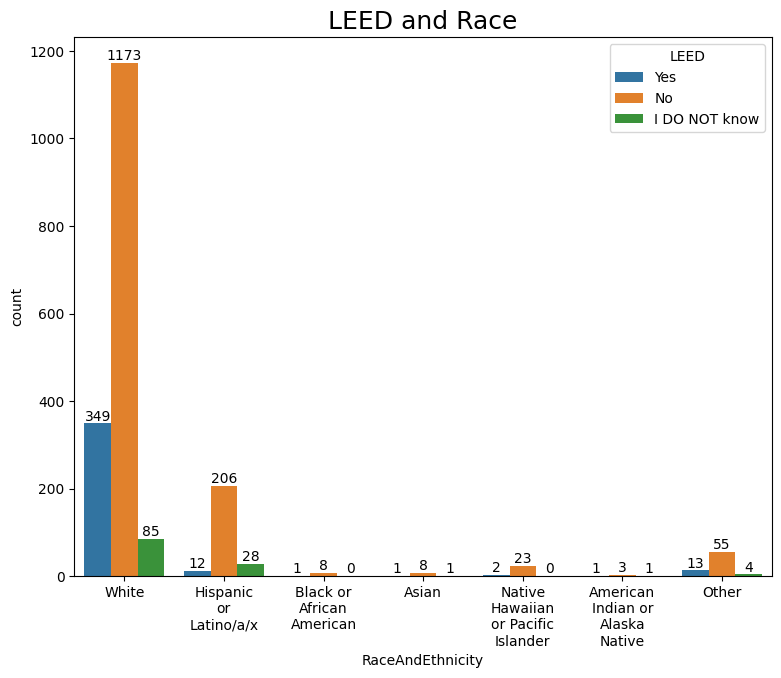

In [503]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'LEED', data = df_clean)
#Add title
plt.title('LEED and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

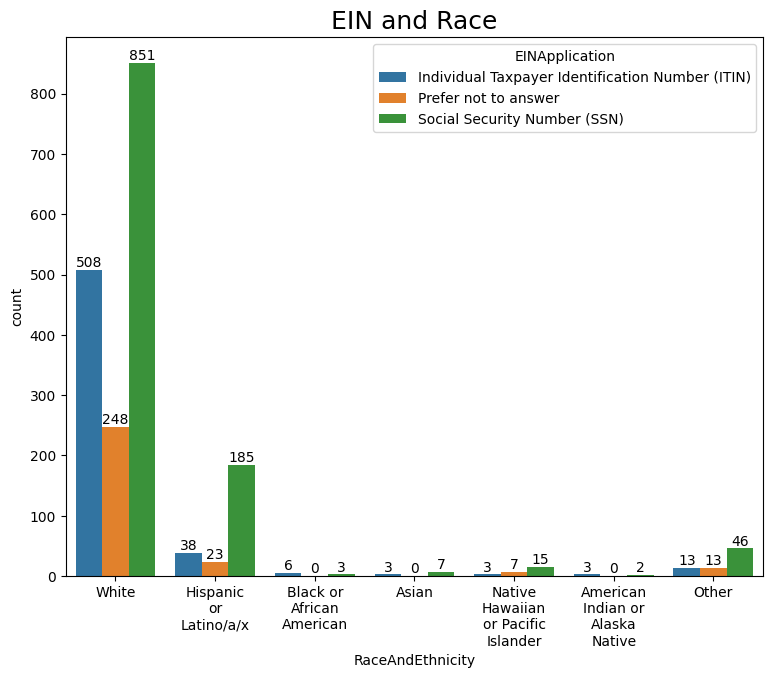

In [504]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EINApplication', data = df_clean)
#Add title
plt.title('EIN and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

In [505]:
df_clean['EnglishLanguage'] = pd.Categorical(df_clean['EnglishLanguage'],
                                         categories = ['Yes','No','Prefer not to say'],
                                         ordered = True)

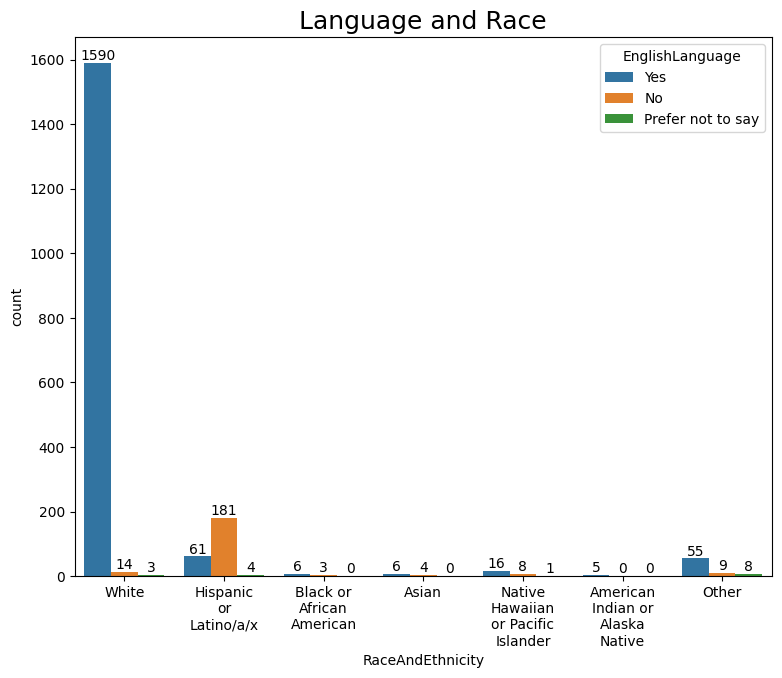

In [506]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EnglishLanguage', data = df_clean)
#Add title
plt.title('Language and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

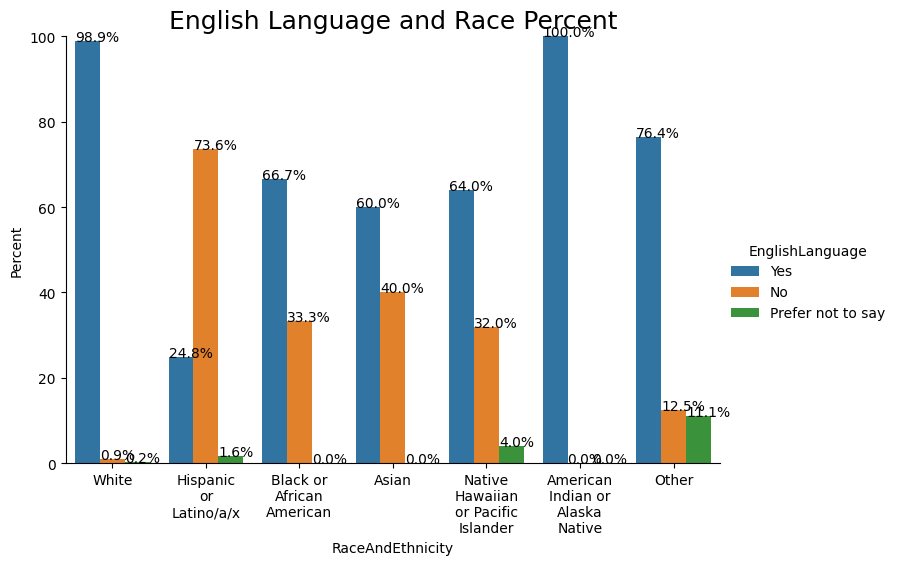

In [507]:
# convert to percentages
new_df = df_clean.groupby('RaceAndEthnicity')['EnglishLanguage'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='RaceAndEthnicity', y='Percent', hue='EnglishLanguage', kind='bar', data=new_df, height=5, aspect = 1.5)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('English Language and Race Percent', fontsize=18)

wrap_labels(g.ax, 10)

# Regression Analyss

In [508]:
# create data frame for regression

df_reg = df_clean
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 8 to 2655
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   StartDate                1974 non-null   object  
 1   EndDate                  1974 non-null   object  
 2   Status                   1974 non-null   object  
 3   IPAddress                1974 non-null   object  
 4   Progress                 1974 non-null   object  
 5   Duration (in seconds)    1974 non-null   object  
 6   Finished                 1974 non-null   object  
 7   RecordedDate             1974 non-null   object  
 8   ResponseId               1974 non-null   object  
 9   RecipientLastName        0 non-null      object  
 10  RecipientFirstName       0 non-null      object  
 11  RecipientEmail           0 non-null      object  
 12  ExternalReference        0 non-null      object  
 13  LocationLatitude         1963 non-null   object  
 14  Location

In [509]:
# clean data
# drop columns
df_reg = df_reg.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q23_7_TEXT', 'Q21_8_TEXT', 'PhoneNumber'], axis=1)

In [510]:
# change license classification categories to numerical
df_reg.loc[df_reg['LicenseClassification'] == 'B-100: General Building', 'LicenseClassification'] = "1" 
df_reg.loc[df_reg['LicenseClassification'] == 'R-100: Residential/Small Commercial', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'R-101: Residential/Small Commercial Non-Structural Remodel/Repair', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'E-100: General Engineering', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'E-200: General Electrical', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'P-200: General Plumbing Contractor', 'LicenseClassification'] = "1"

df_reg.loc[df_reg['LicenseClassification'] == 'R-200: Factory Built Housing', 'LicenseClassification'] = "0" 
df_reg.loc[df_reg['LicenseClassification'] == 'E-201: Residential Electrical', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'P-201: Residential Plumbing', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-202: Solar Photovoltaic', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-220: Carpentry & Flooring', 'LicenseClassification'] = "0"  
df_reg.loc[df_reg['LicenseClassification'] == 'S-230: Masonry, Siding, Stucco, Glass, and Rain Gutter', 'LicenseClassification'] = "0"  
df_reg.loc[df_reg['LicenseClassification'] == 'S-260: Asphalt & Concrete', 'LicenseClassification'] = "0"  
df_reg.loc[df_reg['LicenseClassification'] == 'S-270: Drywall, Paint, and Plastering', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-280: Roofing', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-310: Foundation, Excavation, and Demolition', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-330: Landscape & Recreation', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-350: HVAC', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-370: Fire Suppression Systems', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-410: Boiler, Pipelines, Waste Water, and Water Conditioner', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-440: Sign Installation', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-700: Limited Scope', 'LicenseClassification'] = "0"

df_reg['LicenseClassification'] = df_reg['LicenseClassification'].astype('int')

In [511]:
# change latinx shareholders > 50 percent
df_reg.loc[df_reg['LatinxShareholders'] == 'Yes', 'LatinxShareholders'] = "1"
df_reg.loc[df_reg['LatinxShareholders'] == 'No', 'LatinxShareholders'] = "0"
df_reg.loc[df_reg['LatinxShareholders'] == 'I DO NOT know', 'LatinxShareholders'] = "0"

df_reg['LatinxShareholders'] = df_reg['LatinxShareholders'].astype('int')

In [512]:
# change SBA Loan
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Approved','1')  
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Denied','0')
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Did not apply','0')
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Do not qualify','0')

#Convert to integer
df_reg['SBALoan'] = df_reg['SBALoan'].astype('int')


In [513]:
# change PPP Loan
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Approved','1')  
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Denied','0')
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Did not apply','0')
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Do not qualify','0')

#Convert to integer
df_reg['PPPLoan'] = df_reg['PPPLoan'].astype('int')

In [514]:
# change Bank Credit Union Loan
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Approved','1')  
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Denied','0')
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Did not apply','0')
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Do not qualify','0')

#Convert to integer
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].astype('int')

In [515]:
# change Accountant CPA
df_reg.loc[df_reg['AccountantCPA'] == 'Yes', 'AccountantCPA'] = "1"
df_reg.loc[df_reg['AccountantCPA'] == 'No', 'AccountantCPA'] = "0"
df_reg.loc[df_reg['AccountantCPA'] == 'I DO NOT know', 'AccountantCPA'] = "0"

# Convert to integer
df_reg['AccountantCPA'] = df_reg['AccountantCPA'].astype('int')

In [516]:
# change business plan
df_reg.loc[df_reg['BusinessPlan'] == 'Yes', 'BusinessPlan'] = "1"
df_reg.loc[df_reg['BusinessPlan'] == 'No', 'BusinessPlan'] = "0"
df_reg.loc[df_reg['BusinessPlan'] == 'I DO NOT know', 'BusinessPlan'] = "0"

# Convert to integer
df_reg['BusinessPlan'] = df_reg['BusinessPlan'].astype('int')

In [517]:
# change gender
df_reg.loc[df_reg['Gender'] == 'Male', 'Gender'] = "1"
df_reg.loc[df_reg['Gender'] == 'Female', 'Gender'] = "0"
df_reg.loc[df_reg['Gender'] == 'Non-binary / third gender', 'Gender'] = "0"
df_reg.loc[df_reg['Gender'] == 'Prefer not to say', 'Gender'] = "0"

# Convert to integer
df_reg['Gender'] = df_reg['Gender'].astype('int')


In [518]:
# change outstanding debt
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$0', 'TotalOutstandingDebt'] = "0"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$25k or less', 'TotalOutstandingDebt'] = "15"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$25k-$100k', 'TotalOutstandingDebt'] = "75"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$100k-$250k', 'TotalOutstandingDebt'] = "175"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$250k-$1M', 'TotalOutstandingDebt'] = "750"
df_reg.loc[df_reg['TotalOutstandingDebt'] == 'More than $1M', 'TotalOutstandingDebt'] = "1500"

# Convert to integer
df_reg['TotalOutstandingDebt'] = df_reg['TotalOutstandingDebt'].astype('int')


In [519]:
# change Revenue
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$0','0', regex=True)  
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$25k or less','15', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$25k \- \$100k','75', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$100k \- \$250k','175', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$250k \- \$1M','750', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('More than \$1M','1500', regex=True)

#Convert to integer
df_reg['Revenue2022'] = df_reg['Revenue2022'].astype('int')


In [520]:
# change homeowner
df_reg.loc[df_reg['HomeOwner'] == 'Yes', 'HomeOwner'] = "1"
df_reg.loc[df_reg['HomeOwner'] == 'No', 'HomeOwner'] = "0"
df_reg.loc[df_reg['HomeOwner'] == 'Prefer not to say', 'HomeOwner'] = "0"

# Convert to integer
df_reg['HomeOwner'] = df_reg['HomeOwner'].astype('int')


In [521]:
# change LEED
df_reg.loc[df_reg['LEED'] == 'Yes', 'LEED'] = "1"
df_reg.loc[df_reg['LEED'] == 'No', 'LEED'] = "0"
df_reg.loc[df_reg['LEED'] == 'I DO NOT know', 'LEED'] = "0"

# Convert to integer
df_reg['LEED'] = df_reg['LEED'].astype('int')


In [522]:
# change number of employees
df_reg.loc[df_reg['NumOfEmployees'] == '0 or Family', 'NumOfEmployees'] = "0"
df_reg.loc[df_reg['NumOfEmployees'] == 'Less than 5', 'NumOfEmployees'] = "5"
df_reg.loc[df_reg['NumOfEmployees'] == '5-10', 'NumOfEmployees'] = "10"
df_reg.loc[df_reg['NumOfEmployees'] == '11-20', 'NumOfEmployees'] = "15"
df_reg.loc[df_reg['NumOfEmployees'] == '20+', 'NumOfEmployees'] = "25"

# Convert to integer
df_reg['NumOfEmployees'] = df_reg['NumOfEmployees'].astype('int')


In [523]:
# change work accident
df_reg.loc[df_reg['WorkAccidents'] == 'None', 'WorkAccidents'] = "0"
df_reg.loc[df_reg['WorkAccidents'] == '20+', 'WorkAccidents'] = "25"

# Convert to integer
df_reg['WorkAccidents'] = df_reg['WorkAccidents'].astype('int')


In [524]:
# change years of work experience
df_reg.loc[df_reg['YearsofExperience'] == 'less than 1 year', 'YearsofExperience'] = "0"
df_reg.loc[df_reg['YearsofExperience'] == '60+', 'YearsofExperience'] = "60"

# Convert to integer
df_reg['YearsofExperience'] = df_reg['YearsofExperience'].astype('int')


In [525]:
#change english language

df_reg['EnglishLanguage'] = df_reg['EnglishLanguage'].str.replace('Yes','1', regex=True)
df_reg['EnglishLanguage'] = df_reg['EnglishLanguage'].str.replace('No','0', regex=True)
df_reg['EnglishLanguage'] = df_reg['EnglishLanguage'].str.replace('Prefer not to say','0', regex=True)

# Convert to integer
df_reg['EnglishLanguage'] = df_reg['EnglishLanguage'].astype('int')


In [526]:
# change EIN
df_reg.loc[df_reg['EINApplication'] == 'Social Security Number (SSN)', 'EINApplication'] = "1"
df_reg.loc[df_reg['EINApplication'] == 'Individual Taxpayer Identification Number (ITIN)', 'EINApplication'] = "0"
df_reg.loc[df_reg['EINApplication'] == 'Prefer not to answer', 'EINApplication'] = "0"

# Convert to integer
df_reg['EINApplication'] = df_reg['EINApplication'].astype('int')


In [527]:
# change Latinx Employees Percent
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '0%', 'LatinxEmployeesPercent'] = "0"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == 'Less than 25%', 'LatinxEmployeesPercent'] = "1"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '25-50%', 'LatinxEmployeesPercent'] = "2"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '51-75%', 'LatinxEmployeesPercent'] = "3"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '76-100%', 'LatinxEmployeesPercent'] = "4"

# Convert to integer
df_reg['LatinxEmployeesPercent'] = df_reg['LatinxEmployeesPercent'].astype('int')


In [528]:
# change entity type
df_reg.loc[df_reg['EntityType'] == 'Limited Liability Company', 'LLC'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Limited Liability Company', 'LLC'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Sole Proprietorship', 'SoleP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Sole Proprietorship', 'SoleP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Limited Partnership', 'LP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Limited Partnership', 'LP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Limited Liability Partnership', 'LLP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Limited Liability Partnership', 'LLP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Limited Liability Limited Partnership', 'LLLP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Limited Liability Limited Partnership', 'LLLP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Corporation', 'Corp'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Corporation', 'Corp'] = "0"

df_reg.loc[df_reg['EntityType'] == 'General Partnership', 'GenP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'General Partnership', 'GenP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Business Trust', 'BTrust'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Business Trust', 'BTrust'] = "0"

# Convert to integer
df_reg['LLC'] = df_reg['LLC'].astype('int')
df_reg['SoleP'] = df_reg['SoleP'].astype('int')
df_reg['LP'] = df_reg['LP'].astype('int')
df_reg['LLP'] = df_reg['LLP'].astype('int')
df_reg['LLLP'] = df_reg['LLLP'].astype('int')
df_reg['Corp'] = df_reg['Corp'].astype('int')
df_reg['GenP'] = df_reg['GenP'].astype('int')
df_reg['BTrust'] = df_reg['BTrust'].astype('int')


In [529]:
# change education
df_reg.loc[df_reg['Education'] == 'High school graduate or GED', 'HighSchool'] = "1"
df_reg.loc[df_reg['Education'] != 'High school graduate or GED', 'HighSchool'] = "0"

df_reg.loc[df_reg['Education'] == 'Some college', 'SomeCollege'] = "1"
df_reg.loc[df_reg['Education'] != 'Some college', 'SomeCollege'] = "0"

df_reg.loc[df_reg['Education'] == 'Associates degree', 'Associate'] = "1"
df_reg.loc[df_reg['Education'] != 'Associates degree', 'Associate'] = "0"

df_reg.loc[df_reg['Education'] == 'Bachelors degree', 'Bachelor'] = "1"
df_reg.loc[df_reg['Education'] != 'Bachelors degree', 'Bachelor'] = "0"

df_reg.loc[df_reg['Education'] == 'Masters degree', 'Master'] = "1"
df_reg.loc[df_reg['Education'] != 'Masters degree', 'Master'] = "0"

df_reg.loc[df_reg['Education'] == 'Doctorate', 'Doctorate'] = "1"
df_reg.loc[df_reg['Education'] != 'Doctorate', 'Doctorate'] = "0"

# convert to integer

df_reg['HighSchool'] = df_reg['HighSchool'].astype('int')
df_reg['SomeCollege'] = df_reg['SomeCollege'].astype('int')
df_reg['Associate'] = df_reg['Associate'].astype('int')
df_reg['Bachelor'] = df_reg['Bachelor'].astype('int')
df_reg['Master'] = df_reg['Master'].astype('int')
df_reg['Doctorate'] = df_reg['Doctorate'].astype('int')


In [530]:
# change race and ethnicity
df_reg.loc[df_reg['RaceAndEthnicity'] == 'White', 'White'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'White', 'White'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Hispanic or Latino/a/x', 'Latinx'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Hispanic or Latino/a/x', 'Latinx'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Black or African American', 'Black'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Black or African American', 'Black'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Native Hawaiian or Pacific Islander', 'PacificIslander'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Native Hawaiian or Pacific Islander', 'PacificIslander'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'American Indian or Alaska Native', 'NativeAmerican'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'American Indian or Alaska Native', 'NativeAmerican'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Asian', 'Asian'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Asian', 'Asian'] = "0"

# convert to integer
df_reg['White'] = df_reg['White'].astype('int')
df_reg['Latinx'] = df_reg['Latinx'].astype('int')
df_reg['Black'] = df_reg['Black'].astype('int')
df_reg['PacificIslander'] = df_reg['PacificIslander'].astype('int')
df_reg['NativeAmerican'] = df_reg['NativeAmerican'].astype('int')
df_reg['Asian'] = df_reg['Asian'].astype('int')


In [531]:
# change construction focus
df_reg.loc[df_reg['ConstructionFocus'] == 'Residential', 'Residential'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Residential', 'Residential'] = "0"

df_reg.loc[df_reg['ConstructionFocus'] == 'Commercial', 'Commercial'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Commercial', 'Commercial'] = "0"

df_reg.loc[df_reg['ConstructionFocus'] == 'Industrial', 'Industrial'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Industrial', 'Industrial'] = "0"

df_reg.loc[df_reg['ConstructionFocus'] == 'Infrastructure', 'Infrastructure'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Infrastructure', 'Infrastructure'] = "0"

# convert to integer
df_reg['Residential'] = df_reg['Residential'].astype('int')
df_reg['Commercial'] = df_reg['Commercial'].astype('int')
df_reg['Industrial'] = df_reg['Industrial'].astype('int')
df_reg['Infrastructure'] = df_reg['Infrastructure'].astype('int')


In [532]:
# change age

df_reg.loc[df_reg['Age'] == '18 - 24', 'Age'] = "18"
df_reg.loc[df_reg['Age'] == '25 - 34', 'Age'] = "25"
df_reg.loc[df_reg['Age'] == '35 - 44', 'Age'] = "35"
df_reg.loc[df_reg['Age'] == '45 - 54', 'Age'] = "45"
df_reg.loc[df_reg['Age'] == '55 - 64', 'Age'] = "55"
df_reg.loc[df_reg['Age'] == '65 - 74', 'Age'] = "65"
df_reg.loc[df_reg['Age'] == '75 - 84', 'Age'] = "75"
df_reg.loc[df_reg['Age'] == '85 or older', 'Age'] = "85"

# convert to integer
df_reg['Age'] = df_reg['Age'].astype('int')


In [533]:
# change Credit Score

df_reg.loc[df_reg['CreditScore'] == 'less than 620', 'CreditScore'] = "460"
df_reg.loc[df_reg['CreditScore'] == '620-719', 'CreditScore'] = "670"
df_reg.loc[df_reg['CreditScore'] == '720+', 'CreditScore'] = "785"
df_reg.loc[df_reg['CreditScore'] == 'Prefer not to say', 'CreditScore'] = "670"


# convert to integer
df_reg['CreditScore'] = df_reg['CreditScore'].astype('int')


In [534]:
# change Loan Officer Relationship

df_reg.loc[df_reg['LoanOfficerRelationship'] == 'No Relationship', 'LoanOfficerRelationship'] = "0"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Terrible', 'LoanOfficerRelationship'] = "1"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Poor', 'LoanOfficerRelationship'] = "2"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Average', 'LoanOfficerRelationship'] = "3"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Good', 'LoanOfficerRelationship'] = "4"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Excellent', 'LoanOfficerRelationship'] = "5"

# convert to integer
df_reg['LoanOfficerRelationship'] = df_reg['LoanOfficerRelationship'].astype('int')


In [535]:
# change to number of consulting services that they know
df_reg['ConsultingServices'] = df_reg['ConsultingServices'].str.replace(" ", "")
df_reg['ConsultingServices'] = df_reg['ConsultingServices'].fillna("")
df_reg['#ConsultingServices'] = df_reg['ConsultingServices'].apply(lambda x: len(x.split(',')))

# convert to integer
df_reg['#ConsultingServices'] = df_reg['#ConsultingServices'].astype('int')


In [536]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 8 to 2655
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   LicenseClassification    1974 non-null   int64   
 1   EntityType               1974 non-null   category
 2   LatinxShareholders       1974 non-null   int64   
 3   Age                      1974 non-null   int64   
 4   RaceAndEthnicity         1974 non-null   category
 5   Gender                   1974 non-null   int64   
 6   Education                1974 non-null   category
 7   CreditScore              1974 non-null   int64   
 8   HomeOwner                1974 non-null   int64   
 9   EnglishLanguage          1974 non-null   int64   
 10  YearsofExperience        1974 non-null   int64   
 11  ConstructionFocus        1974 non-null   object  
 12  LEED                     1974 non-null   int64   
 13  BusinessPlan             1974 non-null   int64   
 14  EINAppli

In [537]:
df_reg.columns

Index(['LicenseClassification', 'EntityType', 'LatinxShareholders', 'Age',
       'RaceAndEthnicity', 'Gender', 'Education', 'CreditScore', 'HomeOwner',
       'EnglishLanguage', 'YearsofExperience', 'ConstructionFocus', 'LEED',
       'BusinessPlan', 'EINApplication', 'NumOfEmployees',
       'LatinxEmployeesPercent', 'WorkAccidents', 'SBALoan', 'PPPLoan',
       'BankCreditUnionLoan', 'LoanOfficerRelationship', 'AccountantCPA',
       'Revenue2022', 'TotalOutstandingDebt', 'TopFinancingSource',
       'ConsultingServices', 'LLC', 'SoleP', 'LP', 'LLP', 'LLLP', 'Corp',
       'GenP', 'BTrust', 'HighSchool', 'SomeCollege', 'Associate', 'Bachelor',
       'Master', 'Doctorate', 'White', 'Latinx', 'Black', 'PacificIslander',
       'NativeAmerican', 'Asian', 'Residential', 'Commercial', 'Industrial',
       'Infrastructure', '#ConsultingServices'],
      dtype='object')

# Revenue Regression

In [538]:
# establish independent and dependent variables

# x equals all columns included 

x = df_reg[['LicenseClassification', 'LatinxShareholders', 'Age',
       'Gender', 'CreditScore', 'HomeOwner',
       'EnglishLanguage', 'YearsofExperience', 'LEED',
       'BusinessPlan', 'EINApplication', 'NumOfEmployees',
       'LatinxEmployeesPercent', 'WorkAccidents', 'SBALoan', 'PPPLoan',
       'BankCreditUnionLoan', 'LoanOfficerRelationship', 'AccountantCPA',
       '#ConsultingServices', 'TotalOutstandingDebt',
       'SoleP', 'LLC', 'Corp', 'LP', 'LLP', 'LLLP',
       'GenP', 'BTrust', 'HighSchool', 'SomeCollege', 'Associate', 'Bachelor',
       'Master', 'Doctorate', 'White', 'Latinx', 'Black', 'PacificIslander',
       'NativeAmerican', 'Asian', 'Residential', 'Commercial', 'Industrial',
       'Infrastructure']]

# omitted in x for regression analysis
# 'Revenue', 'EntityType',  'Education', 'ConstructionFocus', 'RaceAndEthnicity', 'TopFinancingSource', 'ConsultingServices'

y = df_reg['Revenue2022']


In [539]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


# regression on revenue 

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Revenue2022   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     55.53
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          3.24e-301
Time:                        05:11:42   Log-Likelihood:                -14697.
No. Observations:                1974   AIC:                         2.948e+04
Df Residuals:                    1930   BIC:                         2.973e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

Correlation matrix is : 
                         LicenseClassification       Age  CreditScore  \
LicenseClassification                 1.000000  0.073645     0.086954   
Age                                   0.073645  1.000000     0.104579   
CreditScore                           0.086954  0.104579     1.000000   
HomeOwner                             0.056148  0.253250     0.294866   
EnglishLanguage                       0.205232  0.219568     0.173350   
YearsofExperience                     0.096031  0.637580     0.161747   
BusinessPlan                          0.053252 -0.006200     0.022871   
NumOfEmployees                        0.001890  0.075631     0.147160   
PPPLoan                              -0.005447  0.118425     0.136848   
BankCreditUnionLoan                   0.054675  0.118277     0.151264   
LoanOfficerRelationship               0.020101  0.156488     0.081178   
AccountantCPA                         0.037145  0.065184     0.115059   
TotalOutstandingDebt      

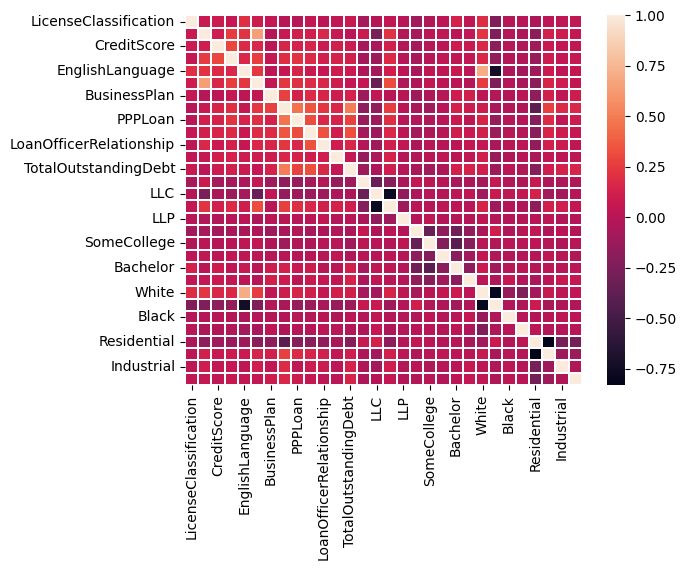

In [540]:
dataframe = pd.DataFrame(df_reg, columns = ['LicenseClassification', 'Age',
       'CreditScore', 'HomeOwner', 'EnglishLanguage', 'YearsofExperience',
       'BusinessPlan', 'NumOfEmployees', 'PPPLoan',
       'BankCreditUnionLoan', 'LoanOfficerRelationship', 'AccountantCPA',
       'TotalOutstandingDebt', 'SoleP', 'LLC', 'Corp', 'LLP',
       'HighSchool', 'SomeCollege', 'Associate', 'Bachelor',
       'Master', 'White', 'Latinx', 'Black', 'PacificIslander',
       'Residential', 'Commercial', 'Industrial',
       'Infrastructure'])

corr_matrix = dataframe.corr()
print("Correlation matrix is : ")

sns.heatmap(dataframe.corr(), linewidths=0.01)


print(corr_matrix)

# 0.5-0.99 is too correlated

# years of experience vs age = 0.63 ----- decided to keep both
# White vs english language = 0.7 ------- decided to keep both
# Latinx vs english language = -0.73 ---- decided to keep both
# Latinx vs White = -0.78 --------------- decided to keep both
# Commercial vs Residential = -0.83 ----- decided to keep both


In [541]:
# x = reduced columns to those that are statistically significant
x = df_reg[['LicenseClassification', 'Age', 'CreditScore', 'HomeOwner',
       'EnglishLanguage', 'YearsofExperience', 'BusinessPlan', 'NumOfEmployees', 'PPPLoan',
       'BankCreditUnionLoan', 'LoanOfficerRelationship', 'AccountantCPA',
       'TotalOutstandingDebt', 'SoleP', 'LLC', 'Corp', 'LLP',
       'Bachelor', 'Master', 'White', 'Latinx',
       'Residential', 'Commercial', 'Industrial']]

y = df_reg['Revenue2022']


In [542]:
# regression on revenue with only significant and non correlated  x variables

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Revenue2022   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     99.71
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          2.77e-317
Time:                        05:11:43   Log-Likelihood:                -14702.
No. Observations:                1974   AIC:                         2.945e+04
Df Residuals:                    1949   BIC:                         2.959e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

# Regression on Bank Loan Approval

In [543]:
# establish independent and dependent variables

# x equals all columns 

x_credit = df_reg[['LicenseClassification', 'LatinxShareholders', 'Age',
       'Gender', 'CreditScore', 'HomeOwner',
       'EnglishLanguage', 'YearsofExperience', 'LEED',
       'BusinessPlan', 'EINApplication', 'NumOfEmployees',
       'LatinxEmployeesPercent', 'WorkAccidents', 'SBALoan', 'PPPLoan',
       'LoanOfficerRelationship', 'AccountantCPA', 'Revenue2022',
       '#ConsultingServices', 'TotalOutstandingDebt',
       'SoleP', 'LLC', 'Corp', 'LP', 'LLP', 'LLLP',
       'GenP', 'BTrust', 'HighSchool', 'SomeCollege', 'Associate', 'Bachelor',
       'Master', 'Doctorate', 'White', 'Latinx', 'Black', 'PacificIslander',
       'NativeAmerican', 'Asian', 'Residential', 'Commercial', 'Industrial',
       'Infrastructure']]

# omitted in x for regression analysis
# ['BankCreditUnionLoan', 'EntityType',  'Education', 'ConstructionFocus',
#  'RaceAndEthnicity', 'TopFinancingSource', 'ConsultingServices']

# predict loan approval for Bank or Credit Union Loan
y_credit = df_reg['BankCreditUnionLoan']

In [544]:
# regression on Bank/Credit Union Loan Approval

xC = sm.add_constant(x_credit)
est_credit = sm.OLS(y_credit, xC)
est2_credit = est_credit.fit()
print(est2_credit.summary())

                             OLS Regression Results                            
Dep. Variable:     BankCreditUnionLoan   R-squared:                       0.290
Model:                             OLS   Adj. R-squared:                  0.274
Method:                  Least Squares   F-statistic:                     18.30
Date:                 Wed, 26 Apr 2023   Prob (F-statistic):          8.54e-113
Time:                         05:11:43   Log-Likelihood:                -1020.8
No. Observations:                 1974   AIC:                             2130.
Df Residuals:                     1930   BIC:                             2375.
Df Model:                           43                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

Correlation matrix is : 
                         LicenseClassification    Gender  CreditScore  \
LicenseClassification                 1.000000  0.097809     0.086954   
Gender                                0.097809  1.000000     0.083859   
CreditScore                           0.086954  0.083859     1.000000   
HomeOwner                             0.056148  0.046704     0.294866   
EnglishLanguage                       0.205232  0.137441     0.173350   
YearsofExperience                     0.096031  0.024813     0.161747   
BusinessPlan                          0.053252 -0.079288     0.022871   
EINApplication                       -0.081845  0.018635    -0.038900   
NumOfEmployees                        0.001890 -0.111834     0.147160   
LatinxEmployeesPercent               -0.191764 -0.146186    -0.054328   
WorkAccidents                         0.012256 -0.039535    -0.023946   
SBALoan                              -0.007024 -0.034751     0.067722   
PPPLoan                   

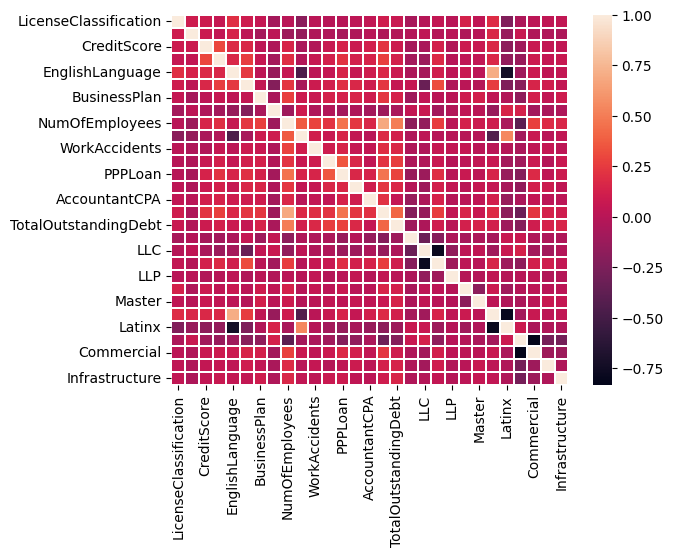

In [545]:
dataframe = pd.DataFrame(df_reg, columns = ['LicenseClassification',
       'Gender', 'CreditScore', 'HomeOwner',
       'EnglishLanguage', 'YearsofExperience',
       'BusinessPlan', 'EINApplication', 'NumOfEmployees',
       'LatinxEmployeesPercent', 'WorkAccidents', 'SBALoan', 'PPPLoan',
       'LoanOfficerRelationship', 'AccountantCPA', 'Revenue2022',
       'TotalOutstandingDebt',
       'SoleP', 'LLC', 'Corp', 'LLP',
       'Bachelor', 'Master', 'White', 'Latinx',
       'Residential', 'Commercial', 'Industrial', 'Infrastructure'])

corr_matrix = dataframe.corr()
print("Correlation matrix is : ")

sns.heatmap(dataframe.corr(), linewidths=0.01)


print(corr_matrix)

# 0.5-0.99 is too correlated

# White vs English Language = 0.7
# Latinx vs English Language = -0.73 ----------- Keep Latinx
# LLC vs Corp = -0.78  ------------------------- Keep Corp
# Residential vs Commercial = -0.83 ------------ Keep Commercial


In [546]:
# x equals statistically signficicant variables

x_credit = df_reg[['LicenseClassification',
       'Gender', 'CreditScore', 'HomeOwner', 'EnglishLanguage',
       'YearsofExperience', 'BusinessPlan', 'EINApplication', 'NumOfEmployees',
       'WorkAccidents', 'SBALoan', 'PPPLoan',
       'LoanOfficerRelationship', 'AccountantCPA', 'Revenue2022',
       'TotalOutstandingDebt',
       'SoleP', 'Corp', 'LLP',
       'Bachelor', 'Master', 'Latinx',
       'Commercial', 'Industrial', 'Infrastructure']]

# omitted in x for regression analysis
# 'BankCreditUnionLoan', 'EntityType',  'Education', 'ConstructionFocus', 'RaceAndEthnicity', 'TopFinancingSource', 'ConsultingServices'

# predict loan approval for Bank or Credit Union Loan
y_credit = df_reg['BankCreditUnionLoan']

In [547]:
# regression 2 on Bank/Credit Union Loan Approval

xC = sm.add_constant(x_credit)
est_credit = sm.OLS(y_credit, xC)
est2_credit = est_credit.fit()
print(est2_credit.summary())

                             OLS Regression Results                            
Dep. Variable:     BankCreditUnionLoan   R-squared:                       0.286
Model:                             OLS   Adj. R-squared:                  0.276
Method:                  Least Squares   F-statistic:                     31.15
Date:                 Wed, 26 Apr 2023   Prob (F-statistic):          5.94e-123
Time:                         05:11:44   Log-Likelihood:                -1026.4
No. Observations:                 1974   AIC:                             2105.
Df Residuals:                     1948   BIC:                             2250.
Df Model:                           25                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

# Basic Tree Classification Model

Split dataset into 80% training data and 20% test data

In [548]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_reg[['LicenseClassification', 'Gender', 'CreditScore', 'HomeOwner', 'EnglishLanguage',
       'YearsofExperience', 'BusinessPlan', 'EINApplication', 'NumOfEmployees',
       'WorkAccidents', 'SBALoan', 'PPPLoan', 'LoanOfficerRelationship', 'AccountantCPA',
       'Revenue2022', 'TotalOutstandingDebt', 'SoleP', 'Corp', 'LLP',
       'Bachelor', 'Master', 'Latinx', 'Commercial', 'Industrial', 'Infrastructure']]
       
y = df_reg['BankCreditUnionLoan']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

In [549]:
full_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
full_tree = full_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict = full_tree.predict(x_test)

In [550]:
full_tree_text = tree.export_text(full_tree)
print(full_tree_text)

|--- feature_14 <= 1125.00
|   |--- feature_12 <= 2.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- feature_15 <= 7.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_15 >  7.50
|   |   |   |   |--- class: 0
|   |   |--- feature_10 >  0.50
|   |   |   |--- feature_14 <= 462.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_14 >  462.50
|   |   |   |   |--- class: 0
|   |--- feature_12 >  2.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- feature_11 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_11 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_10 >  0.50
|   |   |   |--- feature_9 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  1.50
|   |   |   |   |--- class: 1
|--- feature_14 >  1125.00
|   |--- feature_10 <= 0.50
|   |   |--- feature_15 <= 1125.00
|   |   |   |--- feature_12 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_12 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- feature_15 >  1125.00
| 

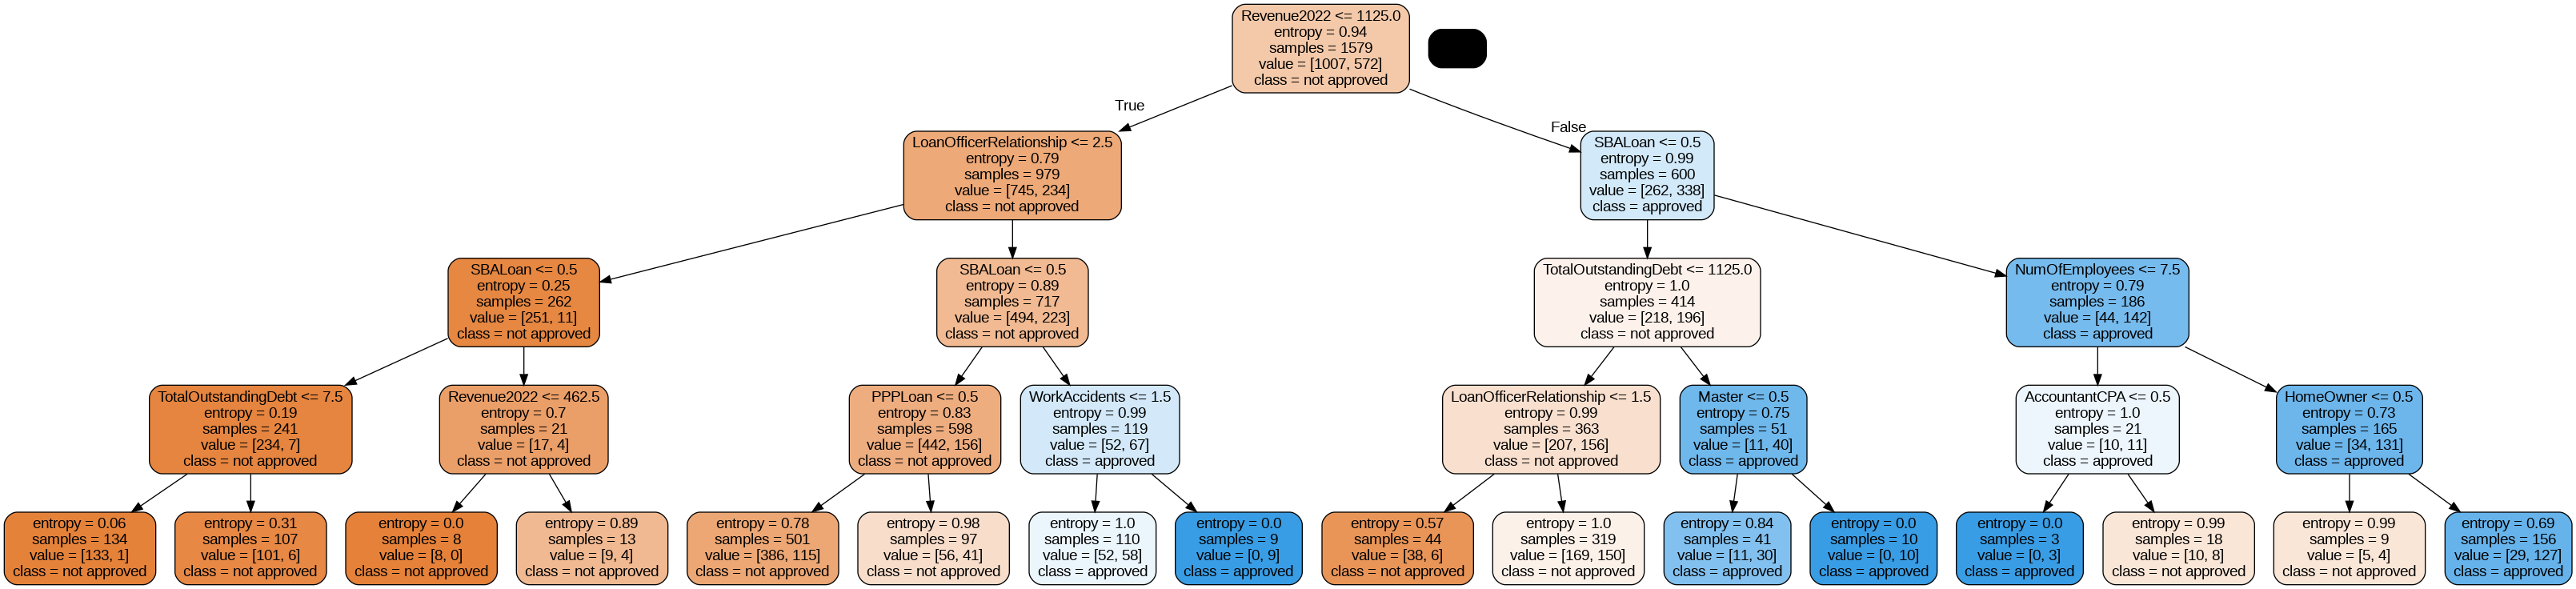

In [551]:
# display model

dot_data = StringIO()
export_graphviz(full_tree, out_file=dot_data, 
                   feature_names=x.columns,class_names=['not approved','approved'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [552]:
#check accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.7189873417721518


[[220  26]
 [ 85  64]]


[Text(0, 0.5, 'Not Approved'), Text(0, 1.5, 'Approved')]

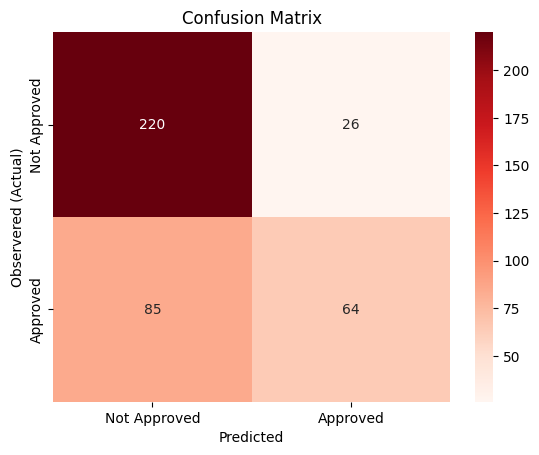

In [553]:
# create a confusion matrix
full_tree_matrix = confusion_matrix(y_test, y_predict)
print(full_tree_matrix)

#Create a heatmap from our confusion matrix
cm = sns.heatmap(full_tree_matrix, annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Not Approved','Approved'])
cm.yaxis.set_ticklabels(['Not Approved','Approved'])

# XGBoost Machine Learning Model

In [554]:
# fit model no training data
model = XGBClassifier(learning_rate=0.3, gamma=10, max_depth=4, tree_method='approx', enable_categorical=True)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=10, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [555]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [556]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.95%


<function matplotlib.pyplot.show(close=None, block=None)>

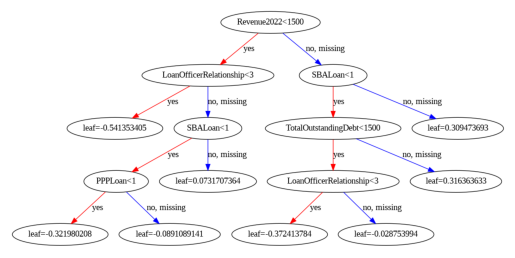

In [557]:
plot_tree(model)
plt.show